<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/laxmisahitya/fselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

X, y = load_iris(return_X_y=True)

selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)

print("Original shape:", X.shape)
print("Shape after feature selection:", X_new.shape)

Original shape: (150, 4)
Shape after feature selection: (150, 2)


In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

model = LogisticRegression(solver='liblinear')

rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)

selected_features_mask = rfe.get_support()
selected_feature_names = X.columns[selected_features_mask]

print("Selected features:", selected_feature_names)

Selected features: Index(['sepal width (cm)', 'petal width (cm)'], dtype='object')


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:\n", feature_importances)

Feature Importances:
 petal length (cm)    0.436130
petal width (cm)     0.436065
sepal length (cm)    0.106128
sepal width (cm)     0.021678
dtype: float64


In [11]:
import pandas as pd
import numpy as np

data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 4, 6, 8, 10],
    'feature3': [5, 4, 3, 2, 1],
    'feature4': [10, 8, 6, 4, 2],
    'target': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

target_correlations = correlation_matrix['target'].abs().sort_values(ascending=False)
print("\nCorrelations with Target Variable:")
print(target_correlations)

target_correlation_threshold = 0.5
selected_features_target = target_correlations[target_correlations > target_correlation_threshold].index.tolist()

if 'target' in selected_features_target:
    selected_features_target.remove('target')
print(f"\nFeatures with absolute correlation > {target_correlation_threshold} with target:")
print(selected_features_target)

df_features = df.drop('target', axis=1)
feature_correlation_matrix = df_features.corr().abs()

upper_tri = feature_correlation_matrix.where(np.triu(np.ones(feature_correlation_matrix.shape), k=1).astype(bool))

inter_feature_correlation_threshold = 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > inter_feature_correlation_threshold)]

print(f"\nFeatures to drop due to high inter-feature correlation (> {inter_feature_correlation_threshold}):")
print(to_drop)

final_selected_features = [f for f in selected_features_target if f not in to_drop]
print("\nFinal Selected Features:")
print(final_selected_features)

df_selected = df[final_selected_features + ['target']]
print("\nDataFrame with Selected Features:")
print(df_selected.head())

Correlation Matrix:
          feature1  feature2  feature3  feature4  target
feature1       1.0       1.0      -1.0      -1.0     0.0
feature2       1.0       1.0      -1.0      -1.0     0.0
feature3      -1.0      -1.0       1.0       1.0     0.0
feature4      -1.0      -1.0       1.0       1.0     0.0
target         0.0       0.0       0.0       0.0     1.0

Correlations with Target Variable:
target      1.0
feature1    0.0
feature2    0.0
feature3    0.0
feature4    0.0
Name: target, dtype: float64

Features with absolute correlation > 0.5 with target:
[]

Features to drop due to high inter-feature correlation (> 0.8):
['feature2', 'feature3', 'feature4']

Final Selected Features:
[]

DataFrame with Selected Features:
   target
0       1
1       0
2       1
3       0
4       1


In [12]:
import pandas as pd

data = {
    'Variable A': [10, 12, 15, 18, 20],
    'Variable B': [5, 6, 8, 9, 11],
    'Variable C': [2, 3, 2, 4, 5],
    'Variable D': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Variable A  Variable B  Variable C  Variable D
Variable A    1.000000    0.990473    0.837073    0.997054
Variable B    0.990473    1.000000    0.819178    0.993399
Variable C    0.837073    0.819178    1.000000    0.848875
Variable D    0.997054    0.993399    0.848875    1.000000


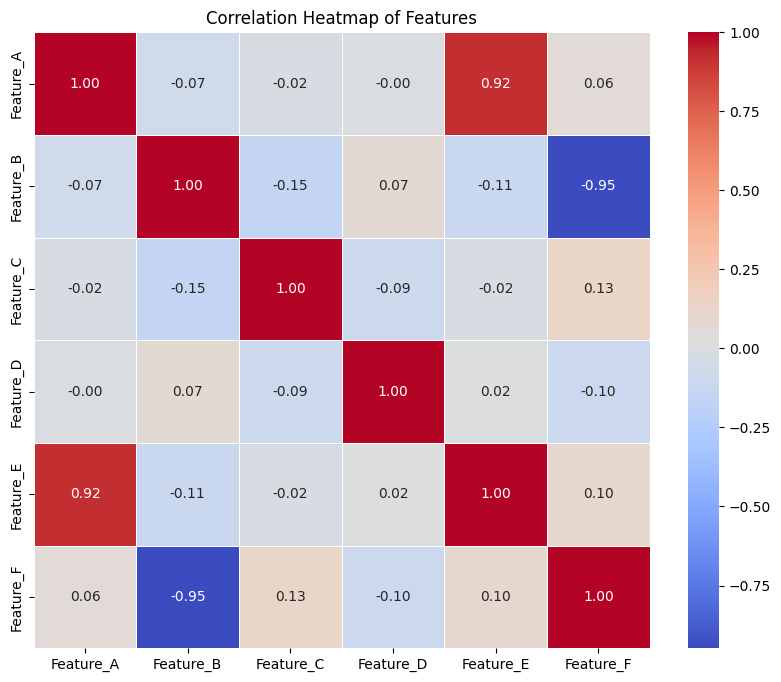

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Feature_A': np.random.rand(100),
    'Feature_B': np.random.rand(100) * 2,
    'Feature_C': np.random.rand(100) * 0.5 + 0.3,
    'Feature_D': np.random.rand(100) * 3 - 1,
}
df = pd.DataFrame(data)

df['Feature_E'] = df['Feature_A'] * 0.7 + np.random.rand(100) * 0.3
df['Feature_F'] = -df['Feature_B'] * 0.6 + np.random.rand(100) * 0.4

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    square=True
)
plt.title('Correlation Heatmap of Features')
plt.show()